# Table of contents

## Functions for solar position

- [`day_of_year`](#dayofyear)
- [`sunset_hour_angle`](#sunsethourangle)
- [`earth_sun_distance`](#earthsundistance)

### `day_of_year`

Calculates the day of year for a `numpy.array` or `numpy.datetime64` date-time objects.

#### Parameters

- `dt`: `numpy.datetime64`

    Objects of type `datetime64` representing the date for which the day of the year will be calculated.

#### Returns

`int` An integer between 1 and 366 representing the day of year for a given date. This function does not account for time information.

In [2]:
import numpy as np
import agmetpy
import matplotlib.pyplot as plt

x = np.datetime64('2019-10-03')

agmetpy.day_of_year(x)

276

### `earth_sun_distance`

Calculates the distance between Earth and Sun on a given date in astronomical units.

#### Parameters

- `dt` : `numpy.datetime64`

    Date

#### Returns

`float`
Distance between Earth and Sun in astronomical units.

Text(0, 0.5, 'Earth-Sun distance (AU)')

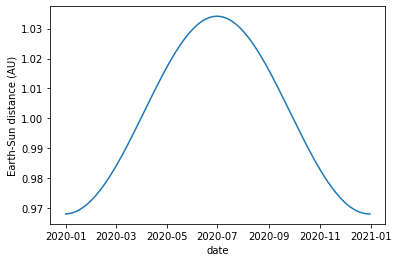

In [3]:
x = np.array([np.datetime64('2020-01-01', 'D') + np.timedelta64(i, 'D') for i in range(366)])
y = agmetpy.earth_sun_distance(x)

plt.plot(x, y)
plt.xlabel('date')
plt.ylabel('Earth-Sun distance (AU)')

Text(0, 0.5, 'solar declination (rad)')

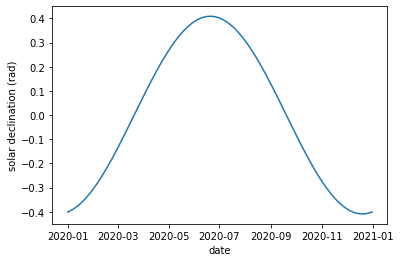

In [4]:
y = agmetpy.solar_declination(x)
plt.plot(x, y)
plt.xlabel('date')
plt.ylabel('solar declination (rad)')

### `sunset_hour_angle`

Calculates the sunset hour angle.

#### Parameters

- `dt` : `numpy.datetime64`

    Date.

- `lat` : `float`

    Latitute.
    

#### Returns

`float`: Sunset hour angle in radians (always positive).

#### Examples

Text(0, 0.5, 'latitude (°)')

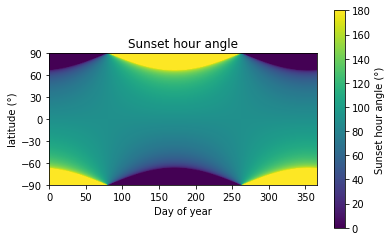

In [5]:
lat = np.array([[89.5 - i] for i in range(180)])
y = agmetpy.sunset_hour_angle(x, lat)

plt.imshow(y * 180 / np.pi, extent=(0, 366, -90, 90))

plt.colorbar(label='Sunset hour angle (°)')
plt.title('Sunset hour angle')
plt.yticks([-90, -60, -30, 0, 30, 60, 90])
plt.xlabel('Day of year')
plt.ylabel('latitude (°)')

Text(0, 0.5, 'vapor saturation pressure (kPa)')

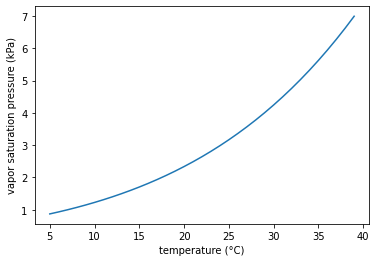

In [6]:
temp = np.array([i for i in range(5, 40)])

# calculates the vapor saturation pressure (Pa) and converts to kPa (divide by 1000).
es = agmetpy.vapour_saturation_pressure(273.15 + temp) / 1000

plt.plot(temp, es)
plt.xlabel('temperature (°C)')
plt.ylabel('vapor saturation pressure (kPa)')

Text(0, 0.5, 'latitude (°)')

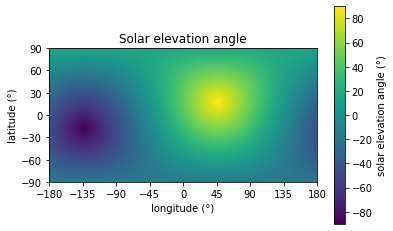

In [7]:
lat = np.array([[89.5 - i] for i in range(180)])
lon = np.array([i - 179.5 for i in range(360)])

y = agmetpy.solar_elevation_angle(np.datetime64('2020-08-01 09:00:00', 's'), lat, lon)
plt.imshow(y * 180/np.pi, extent=(-180, 180, -90, 90))

plt.title('Solar elevation angle')
plt.colorbar(label='solar elevation angle (°)')
plt.yticks([-90, -60, -30, 0, 30, 60, 90])
plt.xticks([-180, -135, -90, -45, 0, 45, 90, 135, 180])
plt.xlabel('longitude (°)')
plt.ylabel('latitude (°)')

Text(0, 0.5, 'Atmospheric pressure (kPa)')

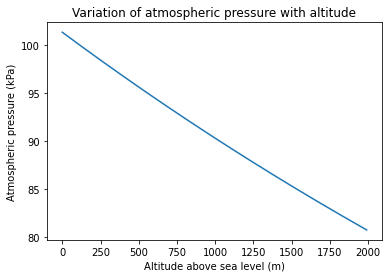

In [8]:
z = np.array([10*i for i in range(200)])
patm = agmetpy.atmospheric_pressure(z)

plt.plot(z, patm / 1000)
plt.title('Variation of atmospheric pressure with altitude')
plt.xlabel('Altitude above sea level (m)')
plt.ylabel('Atmospheric pressure (kPa)')

### Psychrometric functions

AgmetPy has several functions for psychrometric calculations. The following ones are currently available:

- `vapour_saturation_pressure`: Calculates the vapor saturation pressure (Pa) based on air temperature (K).
- `absolute_humidity`: calculates absolute humidity of air (kg/m³) based on vapor pressure (Pa) and air temperature (K)
- `specific_humidity`: calculates specific humidity of air (kg/kg) given the current atmospheric pressure (Pa), vapor pressure (Pa) and air temperature (K).
- `vapour_pressure_from_specific_humidity`: converts specific humidity (kg/kg) into the corresponding vapor pressure (Pa), given the current air temperature (K), and atmospheric pressure (Pa).
- `vapour_pressure_from_absolute_humidity`: converts absolute humidity (kg/m³) into the corresponding vapor pressure (Pa), given the current air temperature (K).

In [15]:
temp = 273.15 + 22
rh = 80
z = 200

patm = agmetpy.atmospheric_pressure(z)

es = agmetpy.vapour_saturation_pressure(temp)
ea = es * rh / 100

ah = agmetpy.absolute_humidity(ea, temp)
sh = agmetpy.specific_humidity(patm, ea, temp)

result = f'\
Output:\n\
Air temperature: {temp - 273.15:.1f} °C\n\
Relative humidity: {rh:.1f}%\n\
Vapor saturation pressure: {es/1000:.2f} kPa\n\
Vapor pressure: {ea/1000:.2f} kPa\n\
Density of air: {agmetpy.air_density(temp, patm, ea):.2f} kg/m³\n\
Absolute humidity: {1000*ah:.1f} g/m³\n\
Specific humidity: {1000*sh:.1f} g/kg\n\
Vapor pressure calculated with specific humidity: {agmetpy.vapour_pressure_from_specific_humidity(sh, patm, temp)/1000:.2f} kPa\n\
Vapor pressure calculated with absolute humidity: {agmetpy.vapour_pressure_from_absolute_humidity(ah, temp)/1000:.2f} kPa'

print(result)

Output:
Air temperature: 22.0 °C
Relative humidity: 80.0%
Vapor saturation pressure: 2.64 kPa
Vapor pressure: 2.12 kPa
Density of air: 1.16 kg/m³
Absolute humidity: 15.5 g/m³
Specific humidity: 13.4 g/kg
Vapor pressure calculated with specific humidity: 2.12 kPa
Vapor pressure calculated with absolute humidity: 2.12 kPa


In [10]:
sh = 0.0148 # kg/kg
patm = 1e5 # Pa
temp = 273.15 + 26.5 # K

rh = agmetpy.vapour_pressure_from_specific_humidity(sh, patm, temp) / agmetpy.vapour_saturation_pressure(temp)

print(f'The relative humidity is {100*rh:.1f}%')

The relative humidity is 68.1%


Text(0, 0.5, 'latitude (°)')

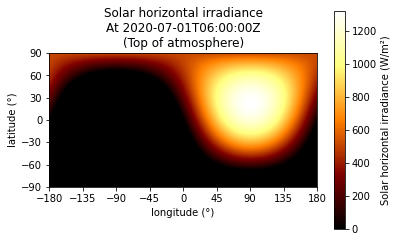

In [11]:
dt = np.datetime64('2020-07-01T06:00:00')
rs = agmetpy.instantaneous_exoatmospheric_irradiance(dt, lat, lon)

plt.imshow(rs, extent=(-180, 180, -90, 90), cmap='afmhot')
plt.title(f'Solar horizontal irradiance\nAt {dt}Z\n(Top of atmosphere)')
plt.colorbar(label='Solar horizontal irradiance (W/m²)')
plt.yticks([-90, -60, -30, 0, 30, 60, 90])
plt.xticks([-180, -135, -90, -45, 0, 45, 90, 135, 180])
plt.xlabel('longitude (°)')
plt.ylabel('latitude (°)')